# Проектная работа

# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. **Ваша задача — разобраться в причинах и помочь компании выйти в плюс.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

# Описание данных
**Структура visits_info_short.csv**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.
**Структура orders_info_short.csv**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.
**Структура costs_info_short.csv**
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

## Шаг  Загрузите данные и подготовьте их к анализу
 Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

### Получим общую информацию о датафреймах

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# импортируем функции для работы со временем
from datetime import datetime, timedelta

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [5]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [6]:
df= [visits,orders,costs]

In [7]:
for i in df: 
    print('Таблица', end='\n\n')
    
    print(i.head(), end='\n\n')
    
    print('Инофрмация о таблице', end='\n\n')
    
    i.info()
    print()
    print('Инофрмация о дубликатах', end='\n\n')
    print(i.duplicated().sum(), end='\n\n')
   
    print('Информация о столбцах', end='\n\n')
    print(i.columns.to_list(), end='\n\n\n')
    
    
   

Таблица

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  

Инофрмация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   

### Предобработка

#### Изменим названия столбцов

In [8]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower() 

In [9]:
for i in df:
    print('Информация о столбцах', end='\n\n')
    print(i.columns.to_list(), end='\n\n\n')
    print('-----------------')

Информация о столбцах

['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']


-----------------
Информация о столбцах

['user_id', 'event_dt', 'revenue']


-----------------
Информация о столбцах

['dt', 'channel', 'costs']


-----------------


#### Изменение типа данных 

In [10]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [11]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [14]:
for i in df: 
    print('Таблица', end='\n\n')
    
    print(i.info(), end='\n\n\n')
    
    print('-----------')

Таблица

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None


-----------
Таблица

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), fl

### Вывод
* Были написаны циклы, которые помогают обработать и выдать информацию сразу по нескольким датафреймах. 
* Не было обнаружно пропусков и дубликатов в таблицах
* Были преведены в порядок названия столбцов 
* Изменен был тип данных

## Шаг. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии


### Функция для расчёта LTV и ROI

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для расчёта удержания

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

В данном проекте, лучше все необходимые функции загрузить сразу
</div>

### Вывод

Созданы функции для расчета и анализа LTV (Lifetime Value, пожизненная ценность), ROI (Return On Investment, окупаемость инвестиций), Retention Rate (коэффициент удержания) и Conversion Rate (коэффициент конверсии).

* LTV -  общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. 

* ROI - на сколько процентов LTV превысил CAC (Customer Acquisition Cost, стоимость привлечения одного клиента).

* Retention Rate показывает, как долго клиенты остаются с компанией.

* CR - процент пользователей когорты, совершивших какое-нибудь действие (оплату покупки).

## Шаг. Проведите исследовательский анализ данных

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

#### Зададим момент анализа

In [18]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()
observation_date

datetime.date(2019, 11, 1)

In [19]:
# горизонт анализа
horizon_days = 14

In [20]:
# создание опции «игнорировать горизонт»
ignore_horizon = False

In [21]:
# минимальная дата привлечения пользователей
min_analysis_date = costs['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [22]:
# максимально возможная дата привлечения с учётом горизонта
max_analysis_date= observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

datetime.date(2019, 10, 19)

### Вывод 
По условиям задачи мы смотрим данные 1 ноября 2019 года. В организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей. Таким образом, **момент анализа** составляет 1 ноября 2019 г., **горизонт анализа** - 14 дней.

**Минимальная дата привлечения пользователей** - 1 мая 2019 г. **Максимальная дата** с учетом горизонта - 19 октября 2019 г.

#### Функция создания профилей

In [23]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



In [24]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


#### Страны и платящие пользователи

In [25]:
 profiles.groupby('region').agg({'user_id': 'nunique','payer': ['sum', 'mean'] })


user_id payer     
              nunique   sum mean
region                          
France          17450   663 0.04
Germany         14981   616 0.04
UK              17575   700 0.04
United States  100002  6902 0.07

#### Устройства и платящие пользователи

In [26]:
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)

In [27]:
device['share'] = round(device.payer / device.user_id, 2)
device

,user_id,payer,share
device,,,
iPhone,54479,3382,0.06
Android,35032,2050,0.06
Mac,30042,1912,0.06
PC,30455,1537,0.05


#### Каналы и платящие пользователи

In [28]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)

In [29]:
channel['share'] = round(channel.payer / channel.user_id, 2)
channel

,user_id,payer,share
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


### Вывод

#### Страны и платящие пользователи
Пользователи приходят в приложение из 4 стран: 
* США, 
* Великобритания, 
* Франция,
* Германия. 

 **США** значительно **лидируют** по количеству пользователей приложения Procrastinate Pro+ **(примерно 100 тыс.)**. Также и доля платящих пользователей выше в США - **7%**.
 
#### Устройства и платящие пользователи
Клиенты пользуются такими устройствами, как 
* iPhone, 
* Android, 
* Mac,
* PC. 

**iPhone** является **самым популярным** устройством среди всех клиентов, включая платящих. 
* Количество клиентов - 54,48 тыс., среди них платящих пользователей - 3,38 тыс. 

Доля платящих пользователей для:
* iPhone, Android и Mac составляет 6%, 
* PC - 5%

#### Каналы и платящие пользователи
Количество рекламных источников привлечения - **10**. Но больше всего пользователей - **"органических" - 56,44 тыс**. Они же на третьем месте по количеству платящих пользователей в **абсолютном выражении - 1,16 тыс.** Если рассматривать только рекламные источники, то наибольшее количество пользователей из **FaceBoom и TipTop (29,14 и 19,56 тыс. соответственно)**.

Доля платящих пользователей распределена следующим образом:
* FaceBoom - 12%
* AdNonSense - 11%
* TipTop
* lambdaMediaAds - по 10%.

Наименьшая доля платящих пользователей у тех, кто не пришел с рекламных источников - всего 2%.

## Шаг. Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Количество потраченных денег

In [30]:
round(costs.costs.sum(), 2)

105497.3

In [31]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,"54,751.30"
FaceBoom,"32,445.60"
WahooNetBanner,"5,151.00"
AdNonSense,"3,911.25"
OppleCreativeMedia,"2,151.25"
RocketSuperAds,"1,833.00"
LeapBob,"1,797.60"
lambdaMediaAds,"1,557.60"
MediaTornado,954.48


In [32]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month

In [33]:
costs.groupby('month').agg({'costs': 'sum'})

,costs
month,
5,"9,978.57"
6,"15,090.05"
7,"16,447.06"
8,"20,657.87"
9,"22,441.34"
10,"20,882.41"


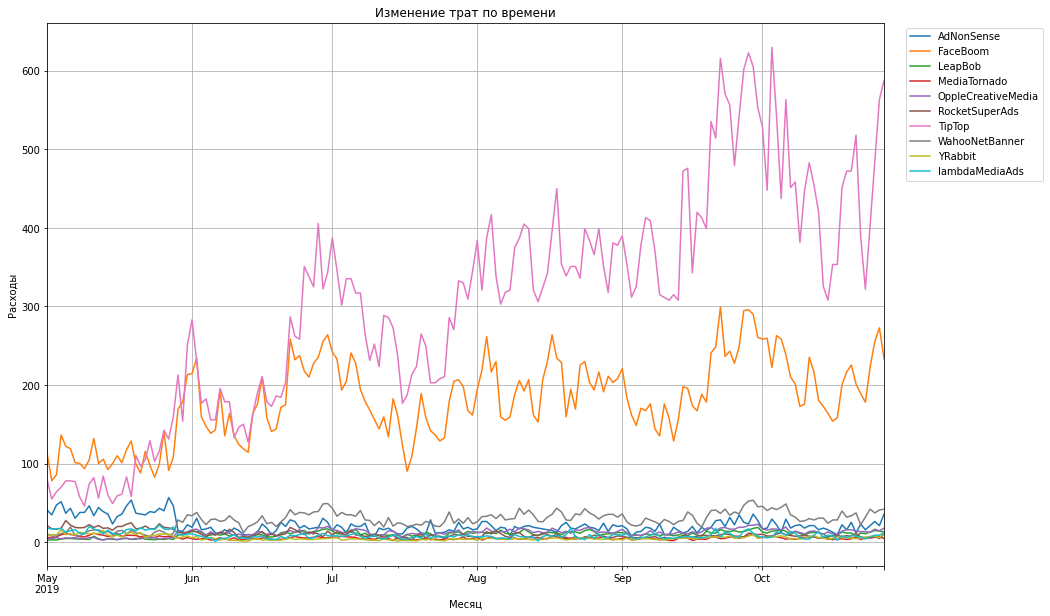

In [34]:
# визуализация изменений трат во времени
costs.pivot_table(
    index='dt',  # даты 
    columns='channel',  # источники переходов
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по времени')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

#### Средняя стоимость привлечения одного покупателя

In [35]:
ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(profiles, 
                                    orders, 
                                    observation_date, 
                                    horizon_days, 
                                    dimensions=['channel']
) # рассчитайте ltv с разбивкой по channel

In [36]:
# отсекаем профили, которые «старше» максимальной даты
ltv_profiles = profiles.query('dt <= @max_analysis_date')

# оставшееся число пользователей на каждый лайфтайм
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})


,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-15,674
2019-10-16,656
2019-10-17,703


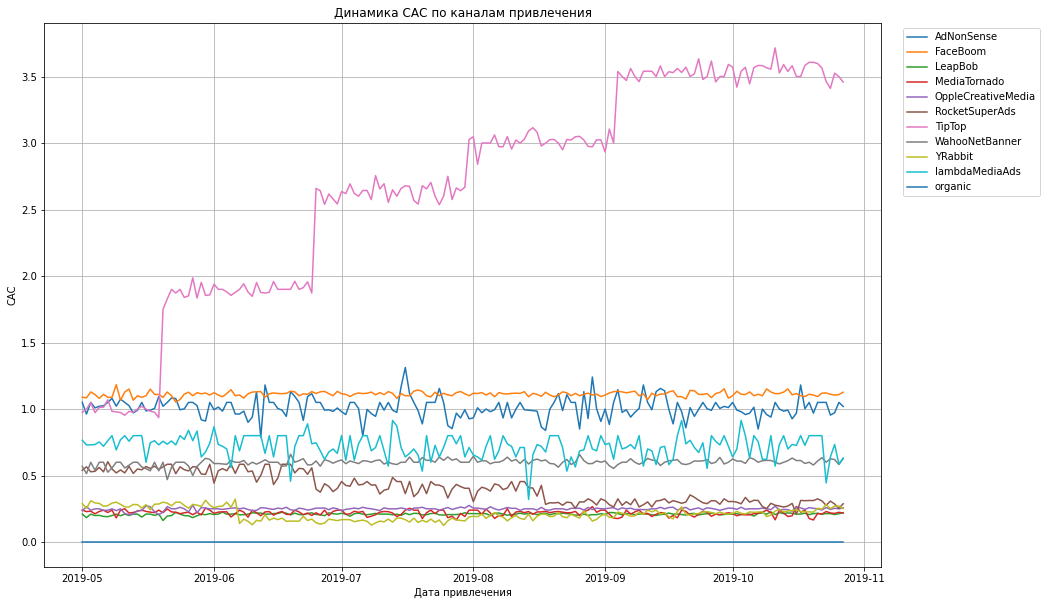

In [37]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

In [38]:
costs_by_source = costs.groupby('channel').agg({'costs':'sum'})
costs_by_source.reset_index()

,channel,costs
0,AdNonSense,"3,911.25"
1,FaceBoom,"32,445.60"
2,LeapBob,"1,797.60"
3,MediaTornado,954.48
4,OppleCreativeMedia,"2,151.25"
5,RocketSuperAds,"1,833.00"
6,TipTop,"54,751.30"
7,WahooNetBanner,"5,151.00"
8,YRabbit,944.22
9,lambdaMediaAds,"1,557.60"


In [39]:
customers_by_source = (orders.merge(visits, on='user_id', how='inner')).groupby('channel').agg({'user_id':'nunique'})\
                        .rename(columns={'user_id':'customers'})

In [40]:
customers_by_source.reset_index()

,channel,customers
0,AdNonSense,556
1,FaceBoom,3832
2,LeapBob,365
3,MediaTornado,392
4,OppleCreativeMedia,336
5,RocketSuperAds,558
6,TipTop,2054
7,WahooNetBanner,538
8,YRabbit,380
9,lambdaMediaAds,323


In [41]:
cac = customers_by_source.join(costs_by_source).reset_index().sort_values(by ='customers')
cac

,channel,customers,costs
9,lambdaMediaAds,323,"1,557.60"
4,OppleCreativeMedia,336,"2,151.25"
2,LeapBob,365,"1,797.60"
8,YRabbit,380,944.22
3,MediaTornado,392,954.48
7,WahooNetBanner,538,"5,151.00"
0,AdNonSense,556,"3,911.25"
5,RocketSuperAds,558,"1,833.00"
10,organic,1436,NaN
6,TipTop,2054,"54,751.30"


In [42]:
cac = cac.fillna(0)

In [43]:
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,channel,customers,costs,cac
6,TipTop,2054,"54,751.30",26.66
7,WahooNetBanner,538,"5,151.00",9.57
1,FaceBoom,3832,"32,445.60",8.47
0,AdNonSense,556,"3,911.25",7.03
4,OppleCreativeMedia,336,"2,151.25",6.40
2,LeapBob,365,"1,797.60",4.92
9,lambdaMediaAds,323,"1,557.60",4.82
5,RocketSuperAds,558,"1,833.00",3.28
8,YRabbit,380,944.22,2.48
3,MediaTornado,392,954.48,2.43


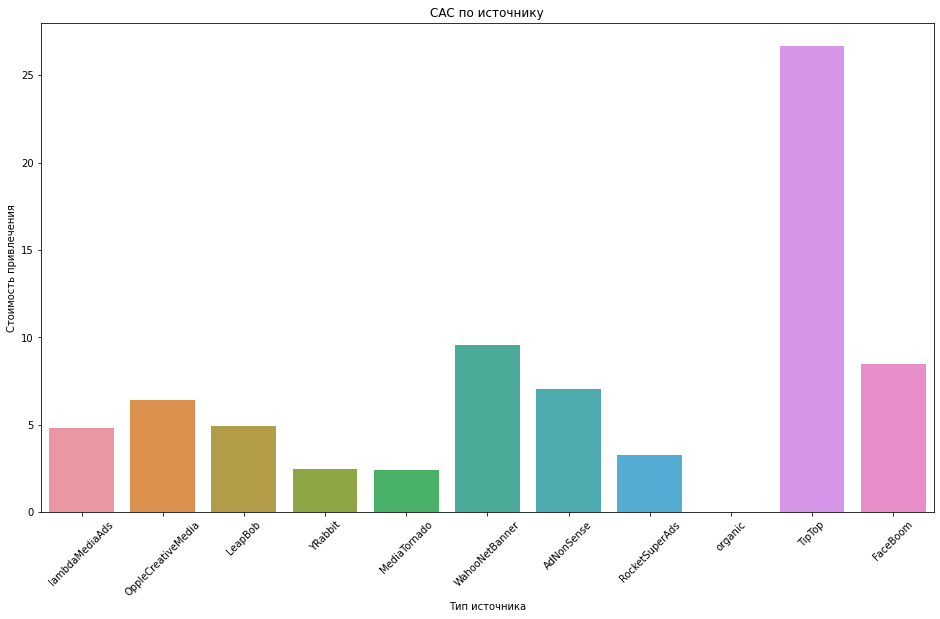

In [44]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="channel", y="cac", data=cac)
plt.title('CAC по источнику')
plt.xticks(rotation=45)
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

#### Средний CAC на одного пользователя для всего проект

In [45]:
cac_total = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
print(cac_total)

acquisition_cost   0.69
dtype: float64


#### Средний CAC на одного пользователя для каждого источника трафика

In [46]:
cac_channel = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)
print(cac_channel)

                    cac
channel                
AdNonSense         1.01
FaceBoom           1.11
LeapBob            0.21
MediaTornado       0.22
OppleCreativeMedia 0.25
RocketSuperAds     0.42
TipTop             2.76
WahooNetBanner     0.60
YRabbit            0.22
lambdaMediaAds     0.73
organic            0.00


### Вывод
* Общая сумма расходов на маркетинг составила **~105497.3**

* Наибольше расходы составили на канал TipTop - **54 751,3**  и FaceBoom - **32 445,6**

Расходы на остальные каналы существенно ниже

* Каждый месяц с мая по сентябрь расходы на маркетинг росли все больше и больше.

        1) График изменения расходов по времени показал, что траты на TipTop возрастали с каждым месяцем.

        2) Траты на FaceBoom росли гораздо медленнее. Все остальные источники существенно уступают по объему расходов на маркетинг

* Стоимость привлечения **органических пользователей** во всех когортах, распределенных по каналам, равна нулю, потому что они не были привлечены за счет рекламы. 
* Если по большинству каналов расходы на протяжении всего времени были примерно равномерными, то TipTop на их фоне значительно выделяется, т.к. расходы на одного пользователя росли почти каждый месяц. Средний CAC по всему проекту составил 0,69 ед.

## Шаг. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.


### Проанализируйте общую окупаемость рекламы

Тк стоимость привлечения органических пользователей во всех когортах, распределенных по каналам, равна нулю, потому что они не были привлечены за счет рекламы, исключим их из анализа

In [47]:
profiles = profiles.query('channel != "organic"')

#### Функция для сглаживания фрейма

In [48]:

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации LTV и ROI

In [49]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)
    
    plt.tight_layout()
    plt.show()

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, 
    orders, 
    observation_date, 
    horizon_days)


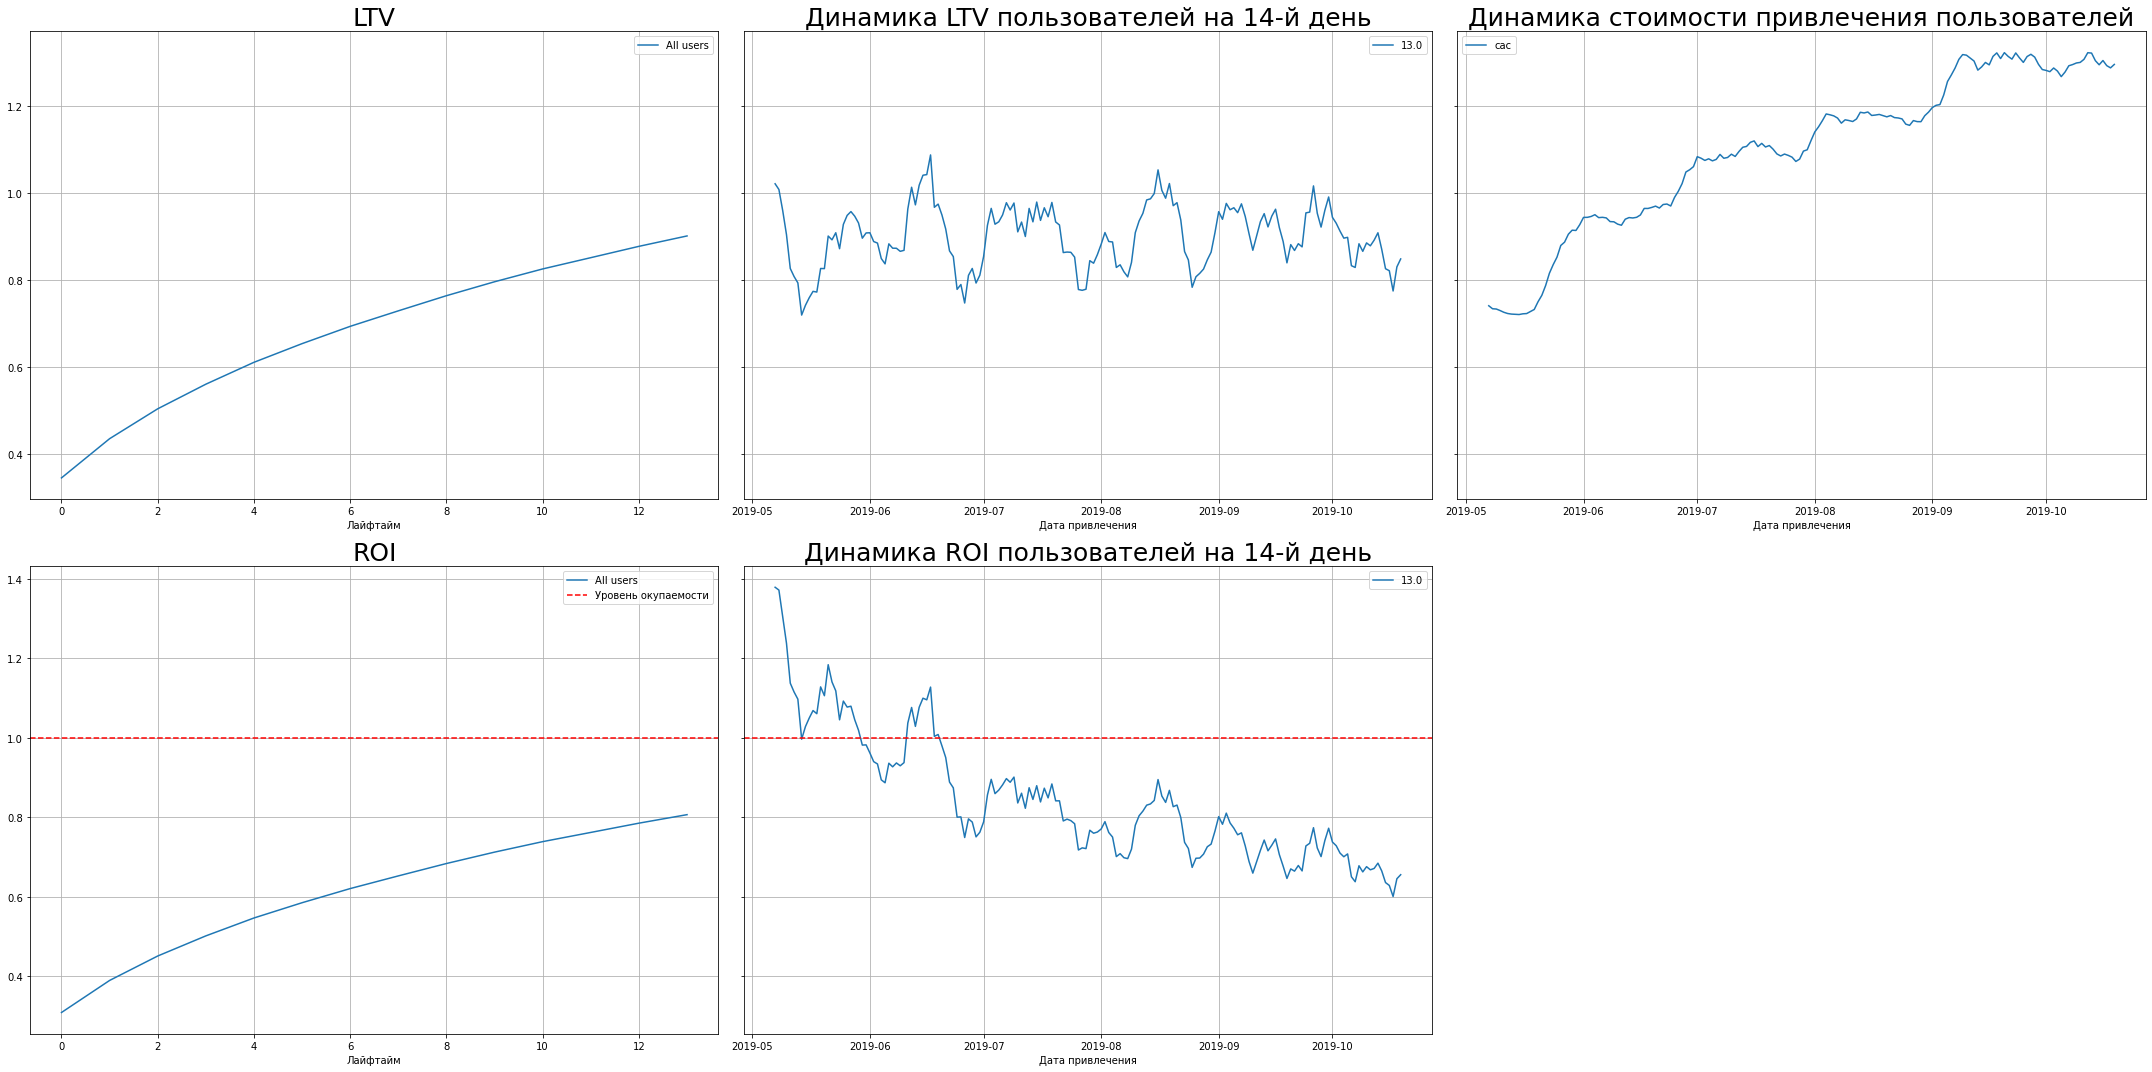

In [51]:
plot_ltv_roi(ltv_grouped, 
             ltv_history, 
             roi_grouped, 
             roi_history, 
             horizon_days) 

#### Вывод
* Из графиков можно сделать вывод, что ROI находится ниже уровня окупаемости.
* Динамика ROI пользователей падает все больше со временем. 
* Динамика стоимости привлечения пользователей постепенно увеличивалась. 
* LTV достаточно стабильно растет.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders, 
    observation_date,
    horizon_days, 
    dimensions = ['device']
)
 

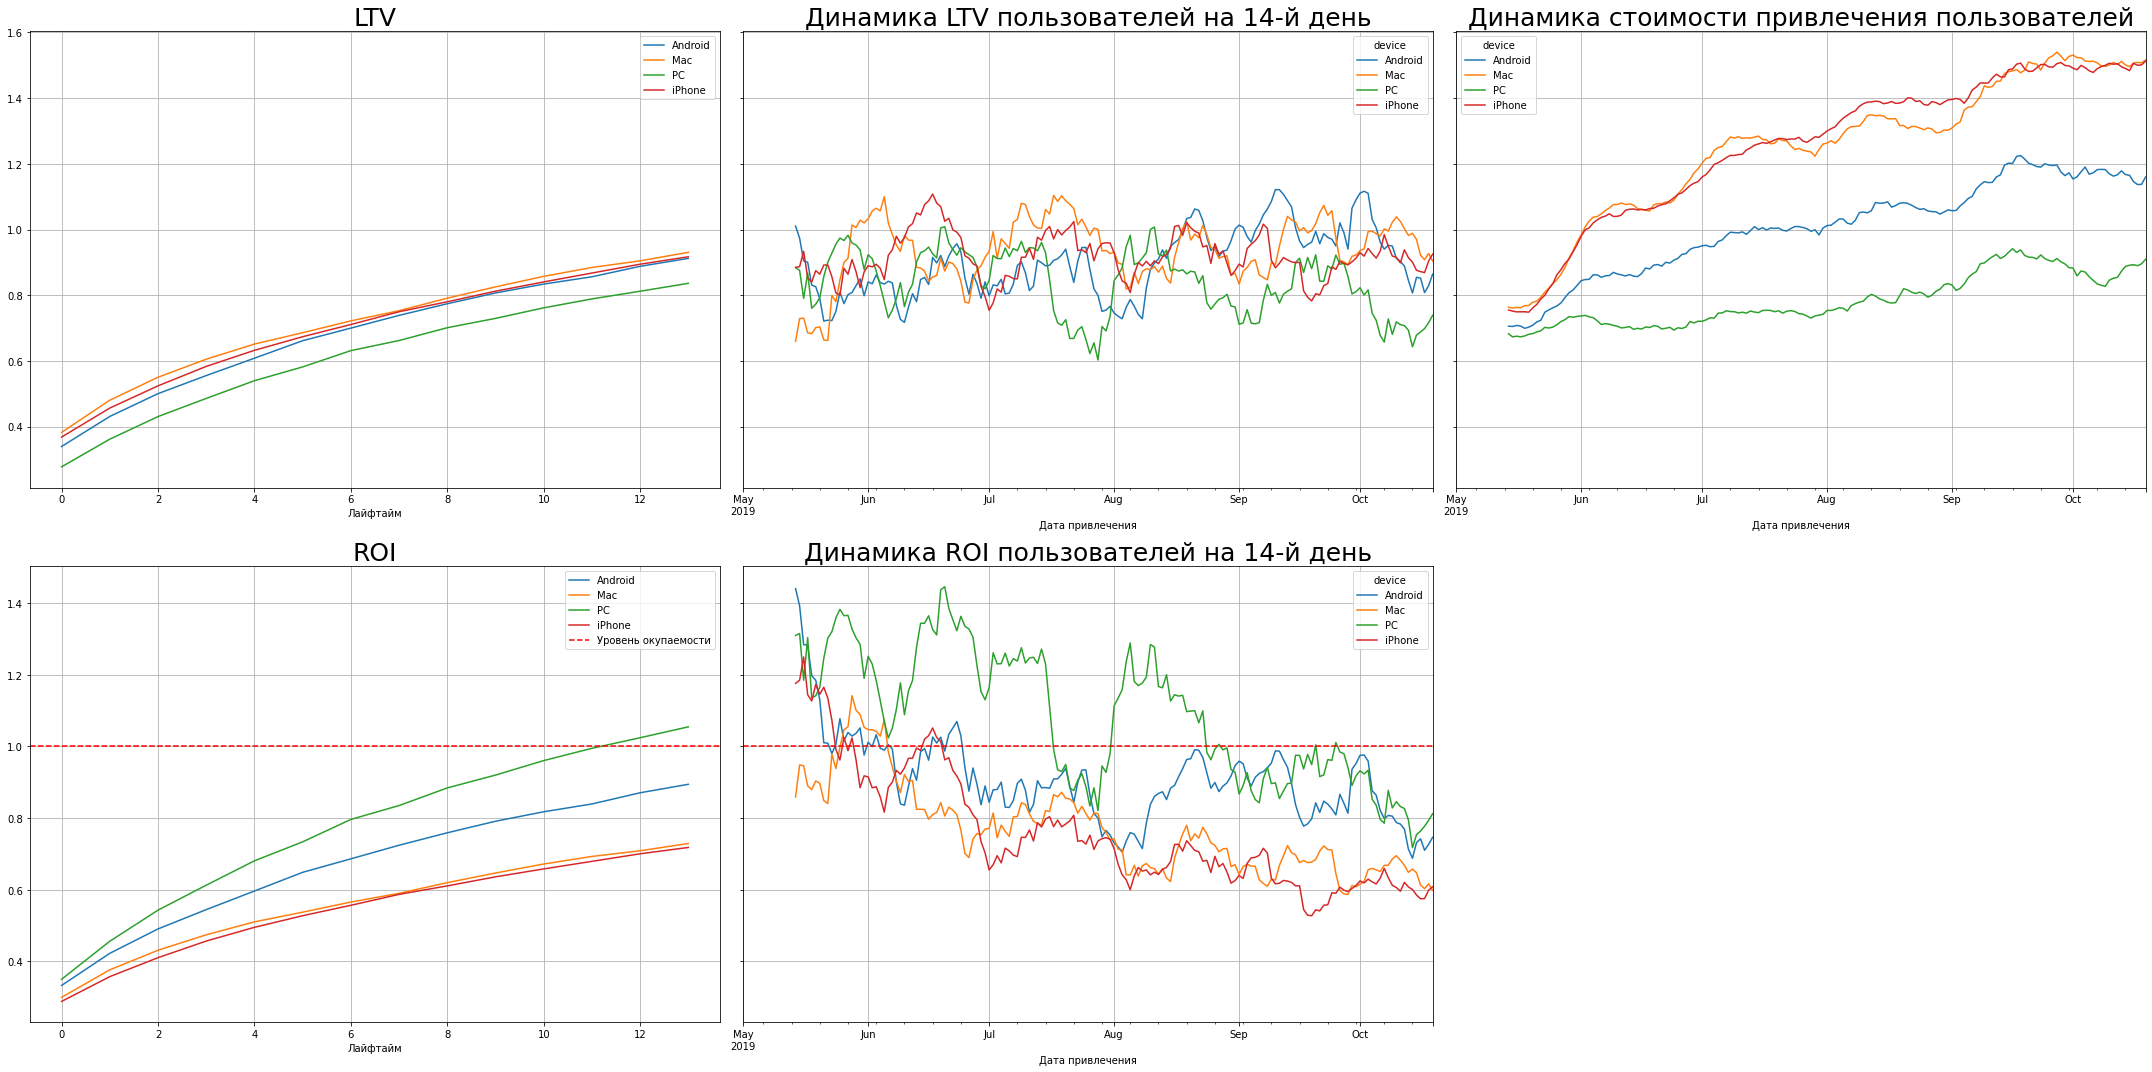

In [53]:
plot_ltv_roi(
    ltv_grouped, 
    ltv_history, 
    roi_grouped, 
    roi_history, 
    horizon_days, 
    window=14
)

#### Вывод
* Пользователи PC окупаются, в отличие от Android, Mac и iPhone. 
* Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC. 
* На графике заметно снижение динамики ROI у всех устройств при росте стоимости привлечения пользователей.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [54]:
 ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders, 
    observation_date,
    horizon_days, 
    dimensions = ['region']
)

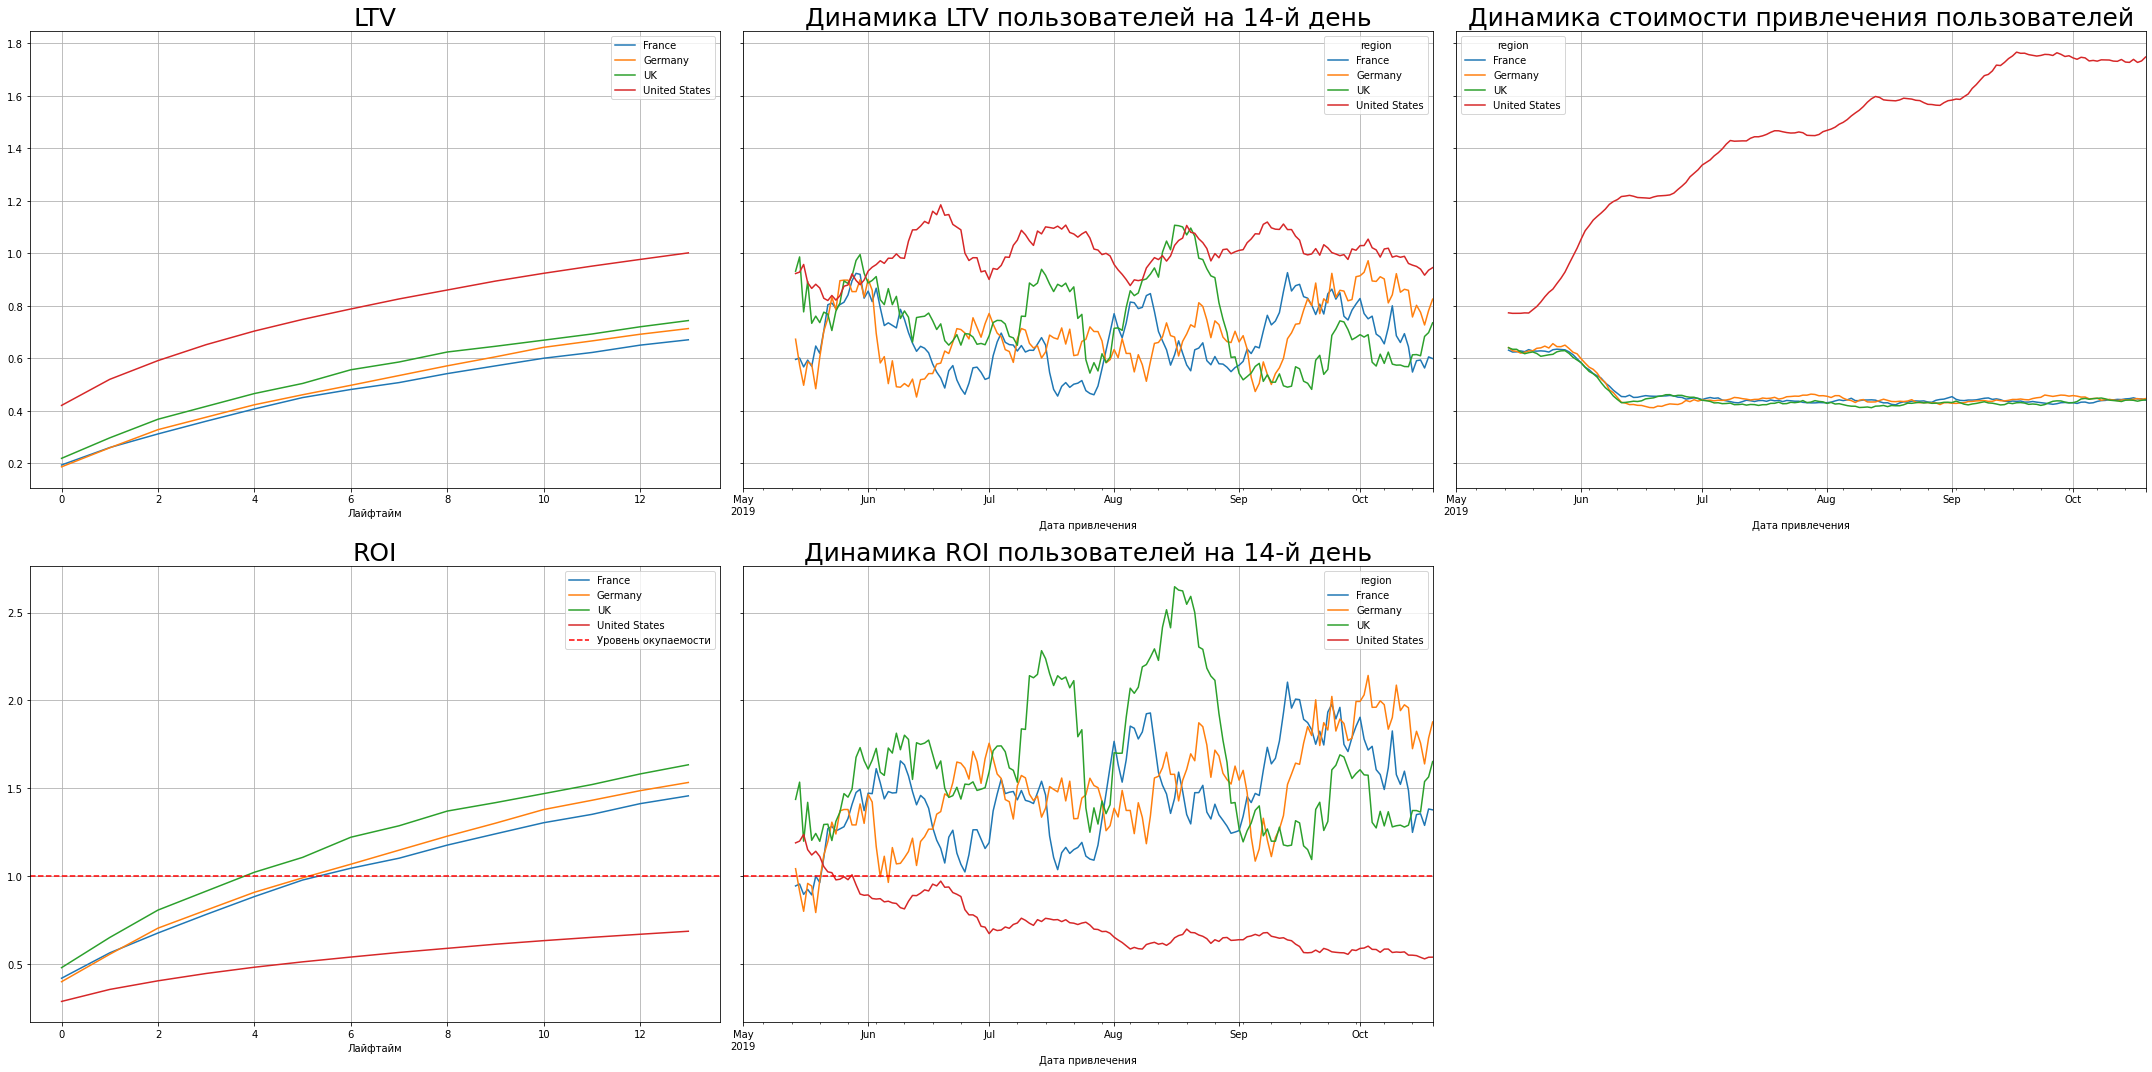

In [55]:
plot_ltv_roi(
    ltv_grouped, 
    ltv_history, 
    roi_grouped, 
    roi_history, 
    horizon_days, 
    window=14
)

#### Вывод
* Реклама не окупилась только в США 
* Динамика стоимости привлечения пользователей показывает огромный разрыв расходов в США по сравнению с другими странами; 
* стоимость в США существенно выше. 
* Динамика ROI показывает снижение окупаемости на пользователя из США ниже уровня безубыточности. 
* Динамика LTV подвержена сезонности и стабильна. LTV в США выше, чем в других странах.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [56]:
 ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders, 
    observation_date,
    horizon_days, 
    dimensions = ['channel']
)

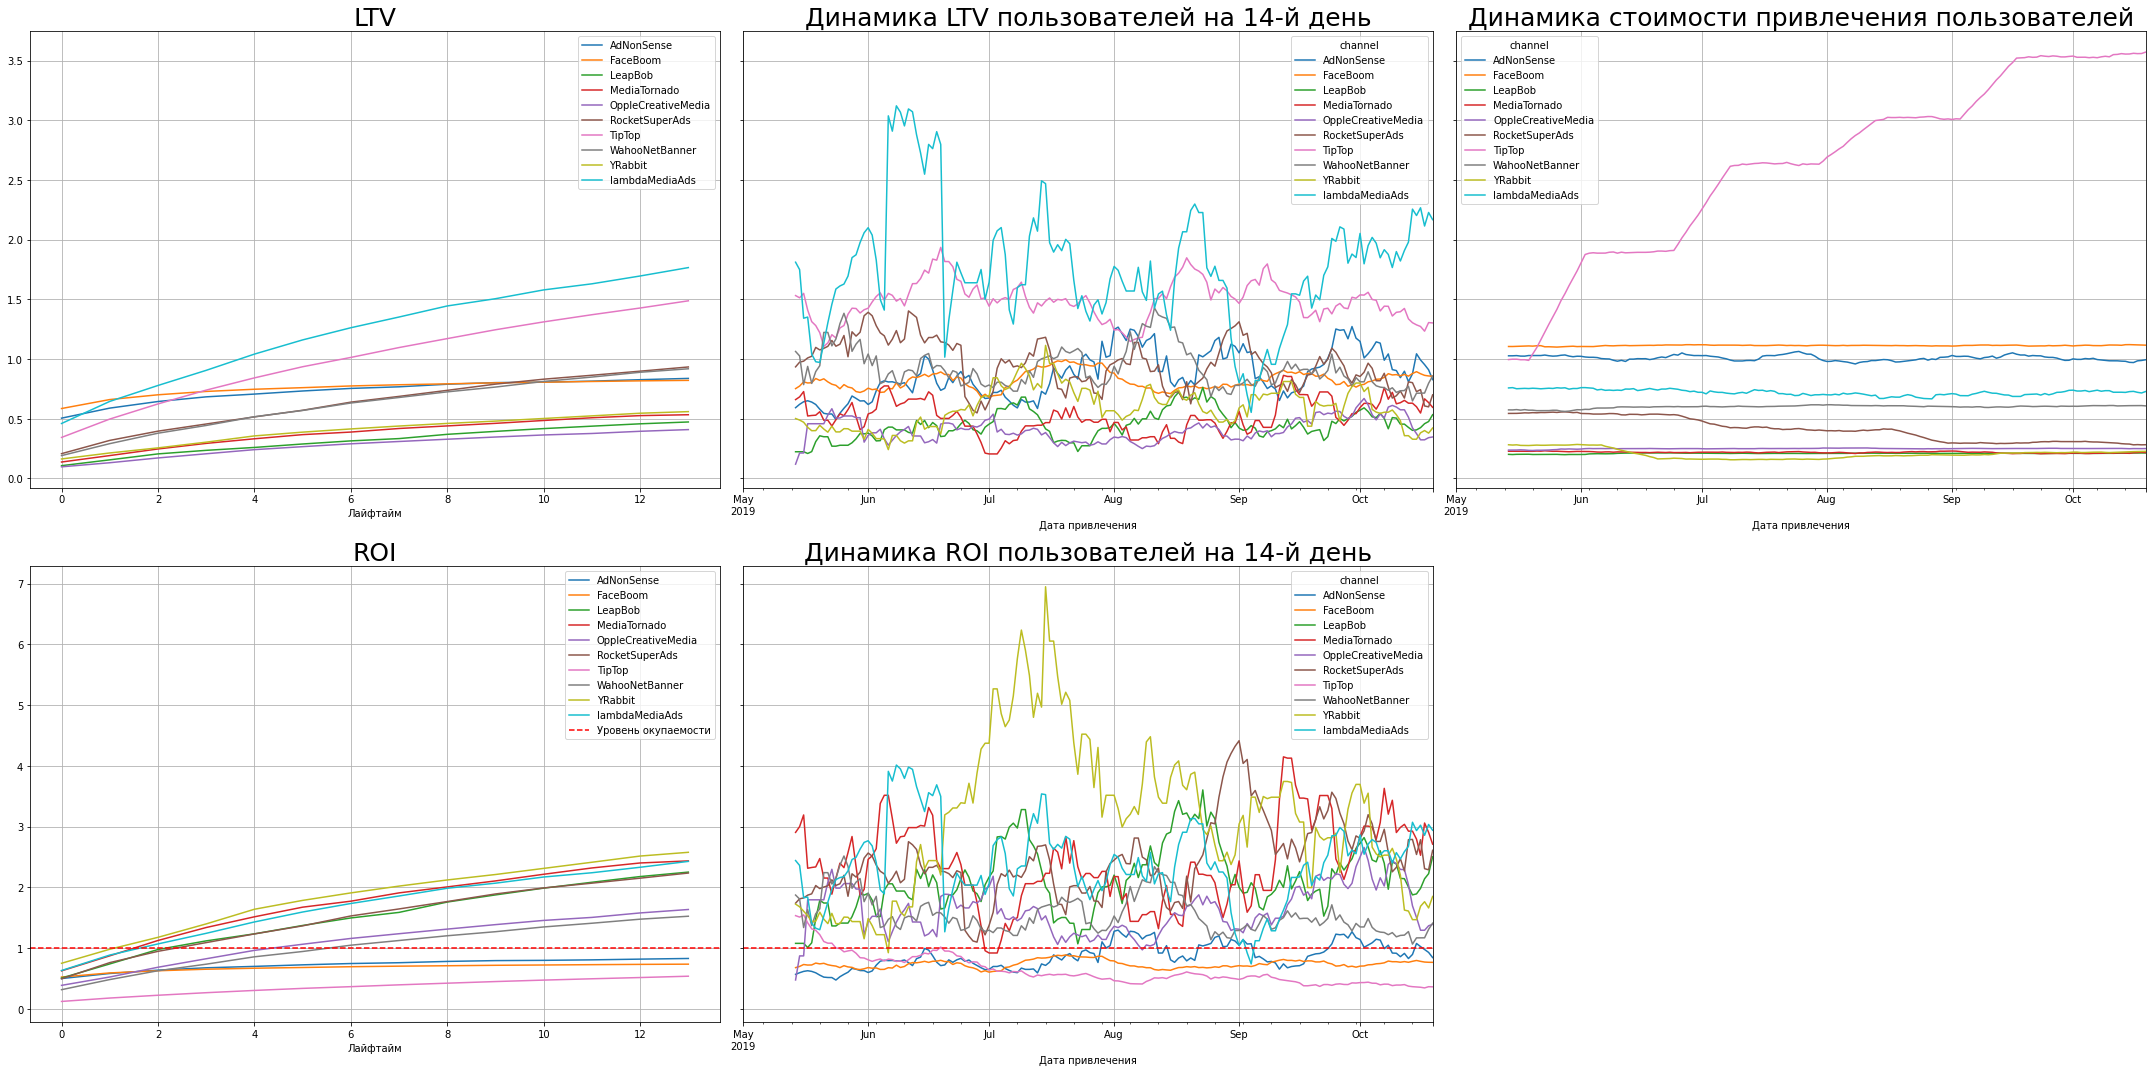

In [57]:
plot_ltv_roi(
    ltv_grouped, 
    ltv_history, 
    roi_grouped, 
    roi_history, 
    horizon_days, 
    window=14
)

#### Вывод
Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop. Но такие расходы не привели к окупаемости. У остальных динамика стабильная. Из 10 каналов только 3 находятся ниже уровня окупаемости, включая TipTop.

### Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

#### Функция для визуализации конверсии

In [58]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()#bbox_to_anchor=(1.0, 1.05), loc='upper left')
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации удержания

In [59]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 20))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Анализ с разбивкой по устройствам

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date,
    horizon_days, 
    dimensions = ['device']
)

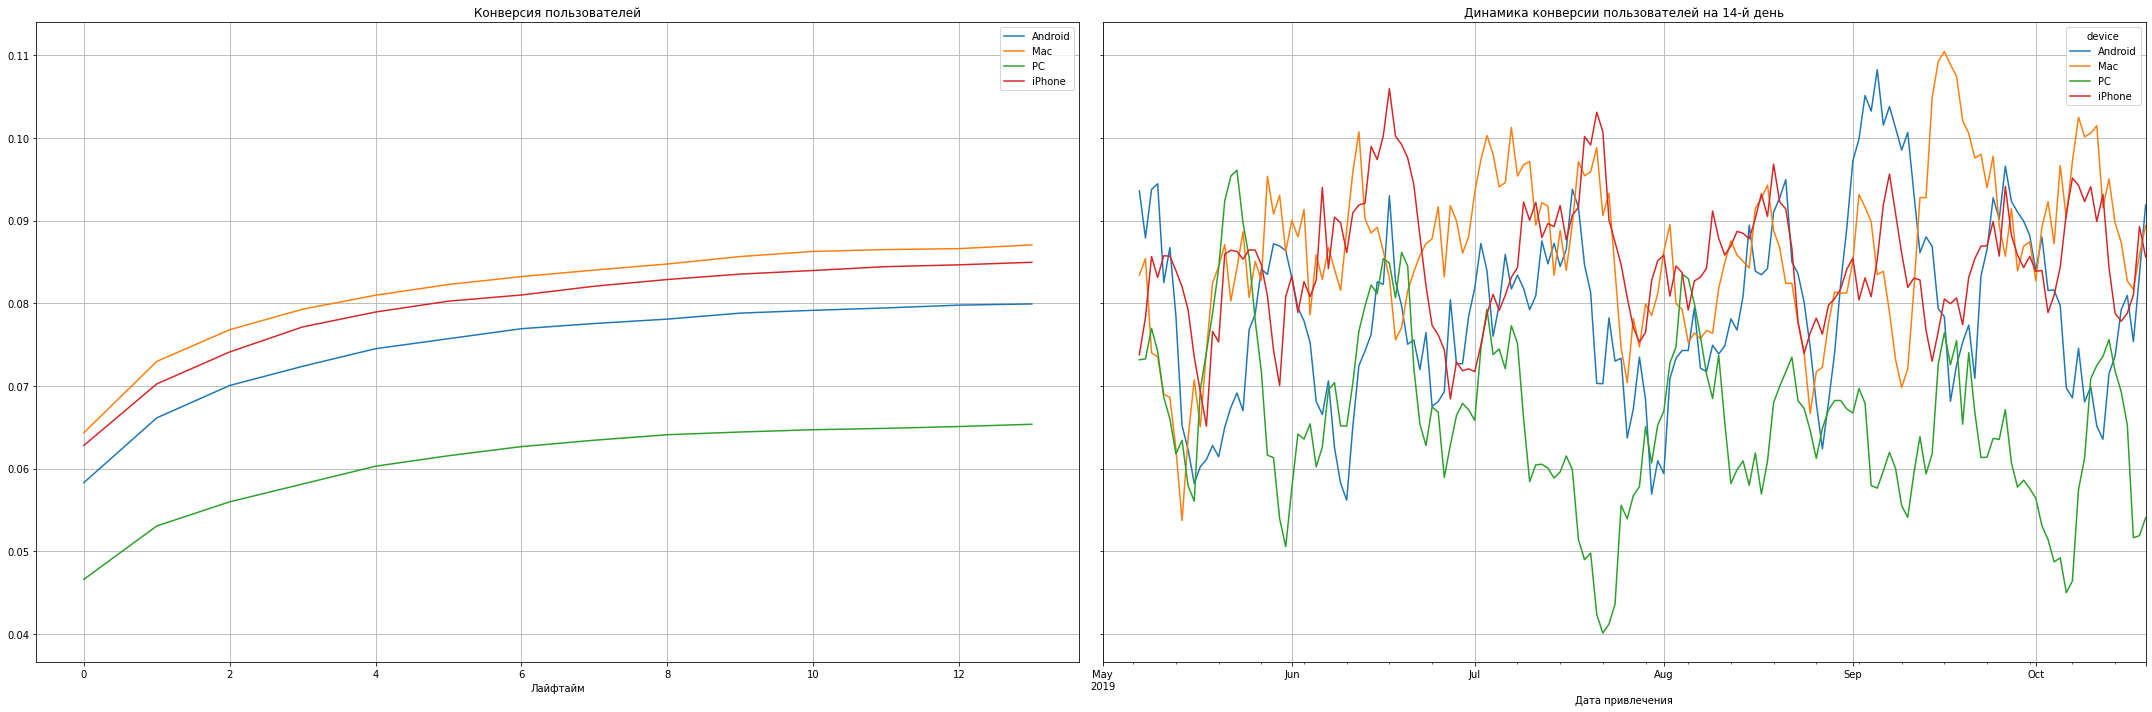

In [61]:
plot_conversion(conversion_grouped, 
                conversion_history, 
                horizon_days)

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date,
    horizon_days, 
    dimensions = ['device']
)

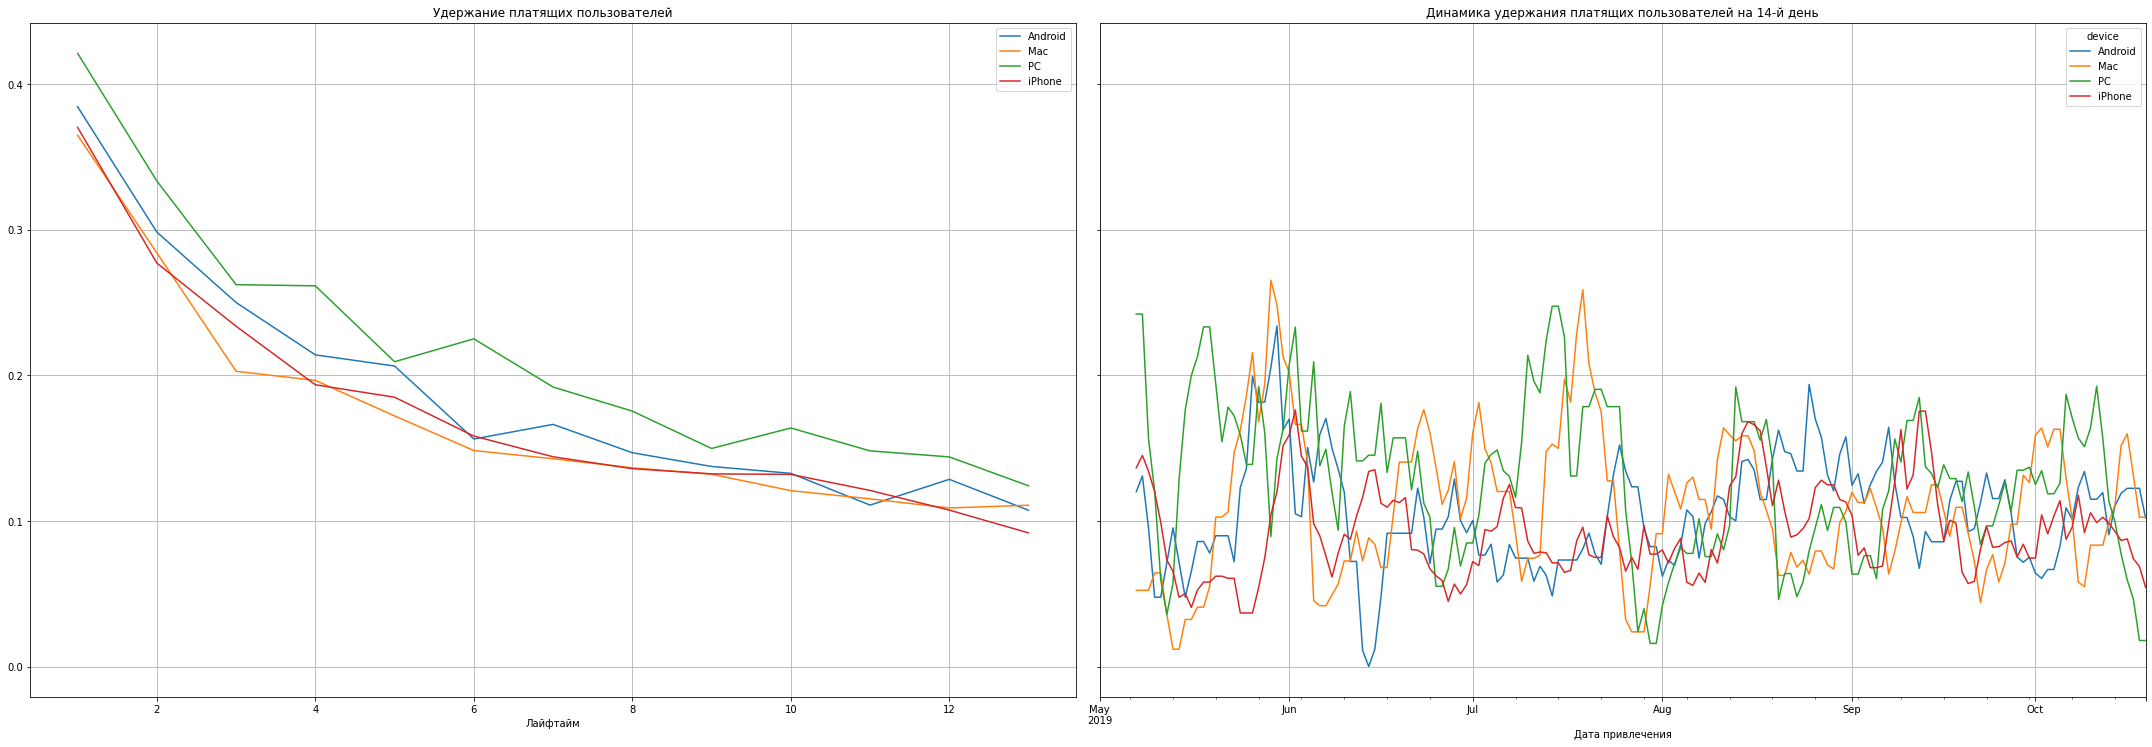

In [63]:
plot_retention(retention_grouped, 
               retention_history, 
               horizon_days)

#### Анализ с разбивкой по регионам

In [64]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date,
    horizon_days, 
    dimensions = ['region']
)

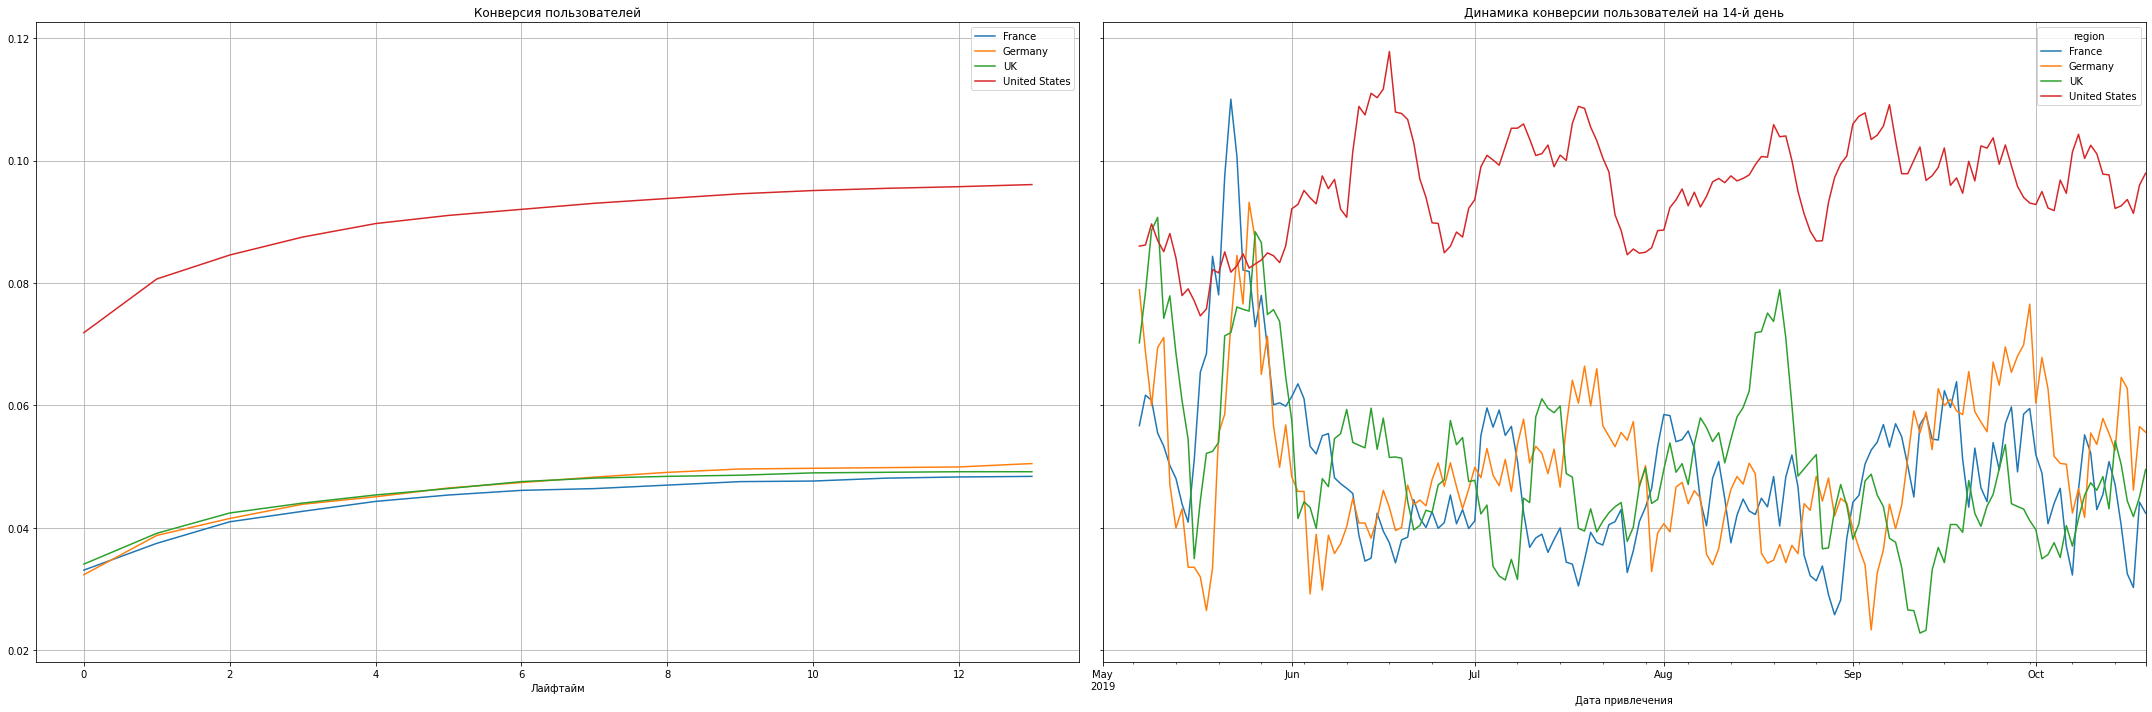

In [65]:
plot_conversion(conversion_grouped, 
                conversion_history, 
                horizon_days)

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date,
    horizon_days, 
    dimensions = ['region']
)

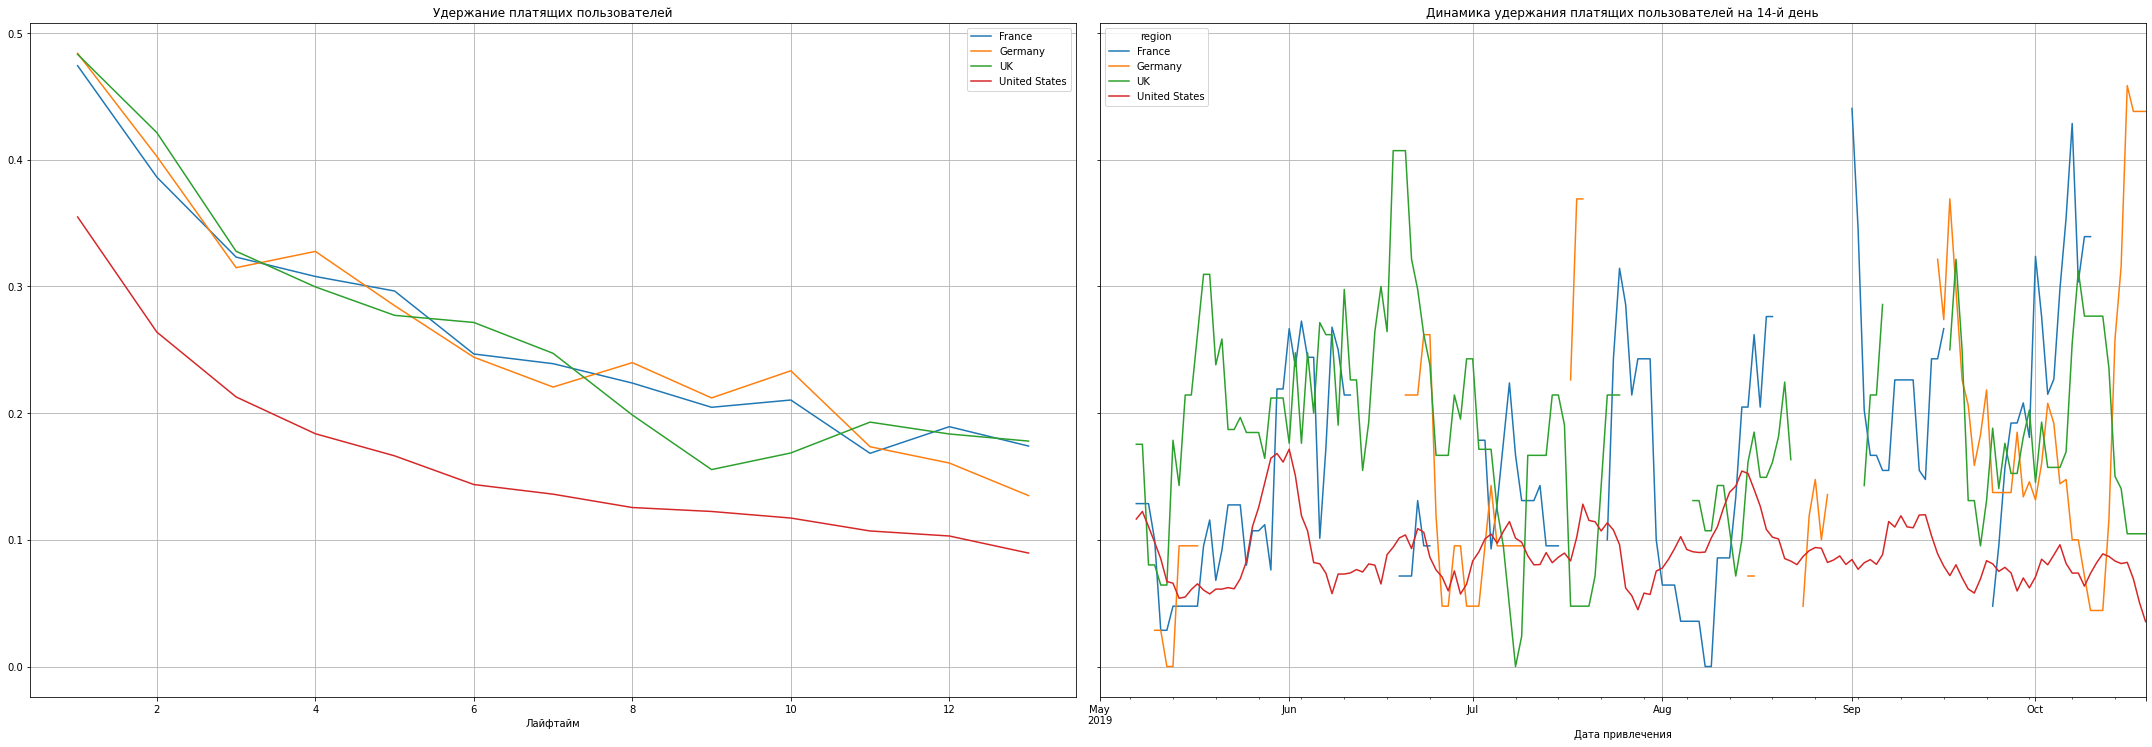

In [67]:
plot_retention(retention_grouped, 
               retention_history, 
               horizon_days)

#### Анализ с разбивкой по каналам

In [68]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date,
    horizon_days, 
    dimensions = ['channel']
)

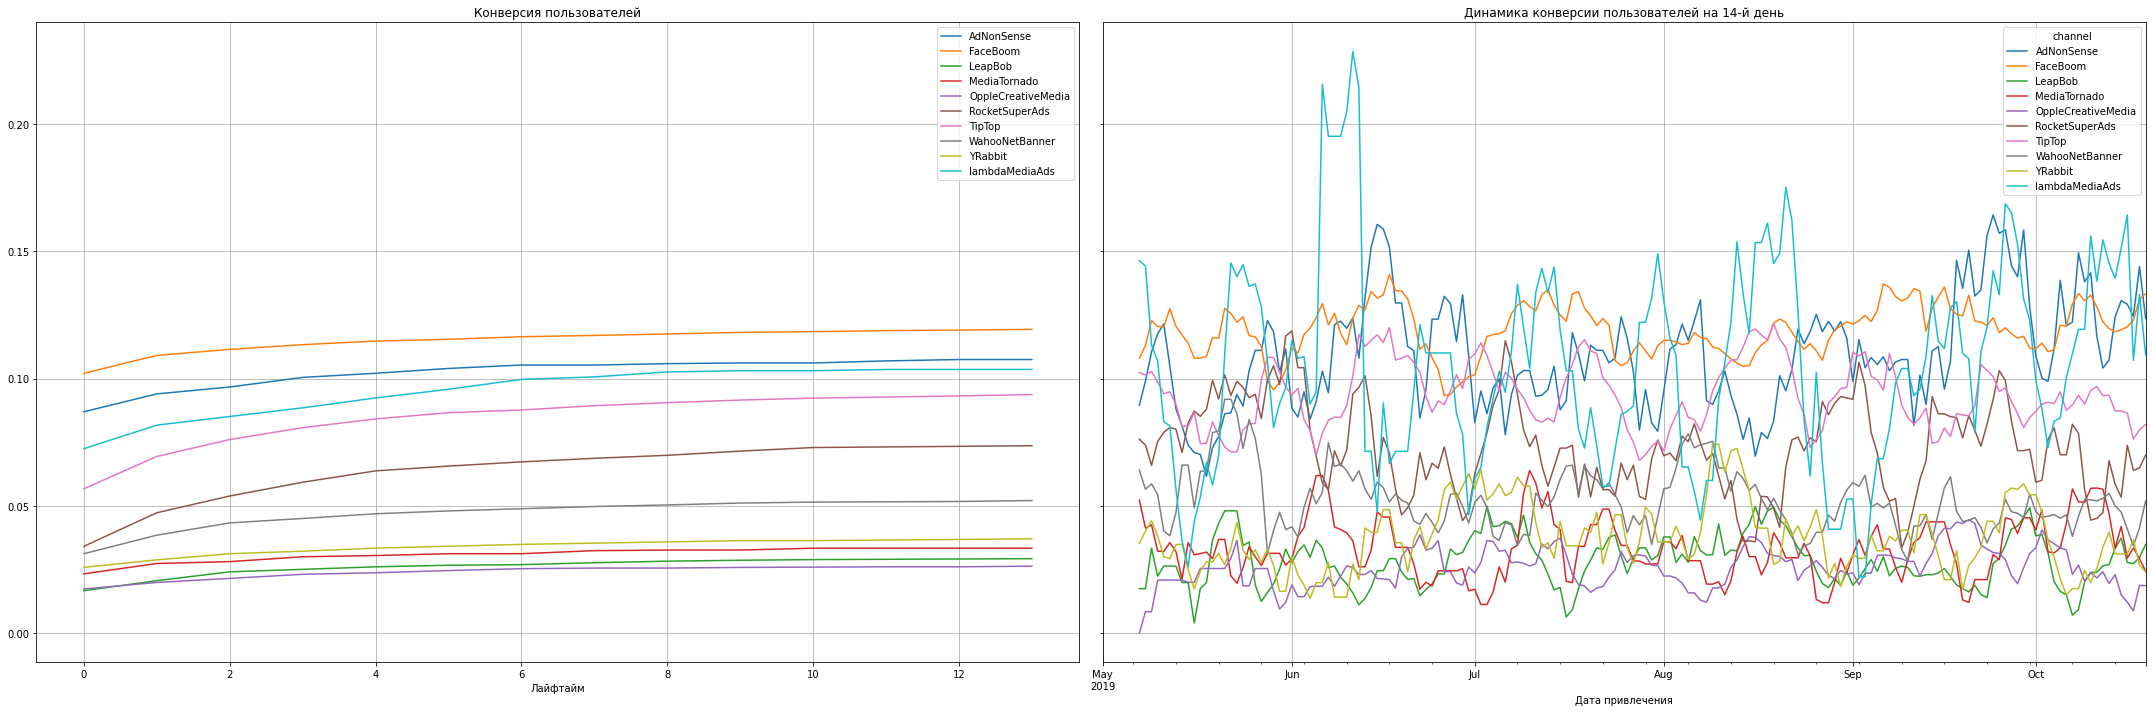

In [69]:
plot_conversion(conversion_grouped, 
                conversion_history, 
                horizon_days)

In [70]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date,
    horizon_days, 
    dimensions = ['channel']
)

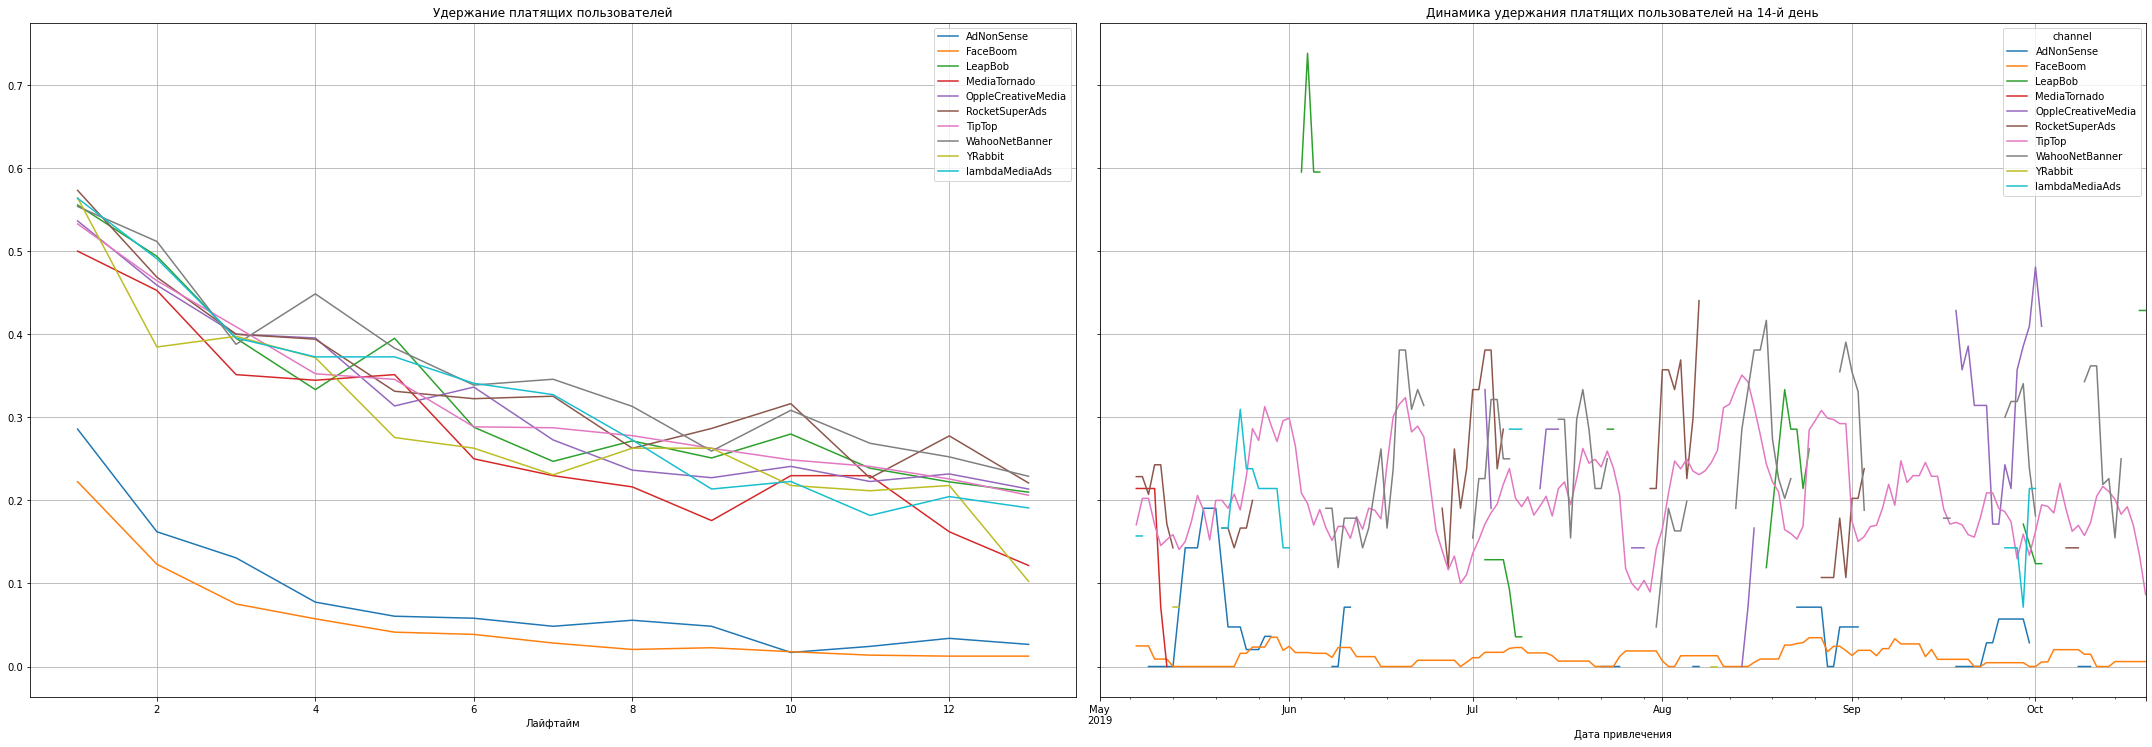

In [71]:
plot_retention(retention_grouped, 
               retention_history, 
               horizon_days)

### Вывод

**Окупаемость** рекламы со временем **падает**, а **стоимость** привлечения пользователей **растет**. В рассматриваемый период **реклама в итоге не окупилась.**

Из всех стран - **США** оказались единственной страной, которая продемонстрировала **убытки по ROI**.

В разрезе по устройствам выявлено **снижение динамики** окупаемости  у всех девайсов при росте стоимости привлечения пользователей. **Mac и iPhone, а также Android** показали результаты ниже уровня окупаемости, при этом у них же выявлены наибольшие расходы на привлечение. 

**Чрезмерные расходы** обнаружены на канал **TipTop**, который в результате **не показал положительных результатов по ROI.**

## Шаг. Выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

### Источники трафика, на которые маркетологам стоит делать упор
Из 10 источников, думаю можно обратить вимание на источник **TipTop** и на источнику **FaceBoom**, тк расходы росли ежемесячно

### Самоокупаемость 
Реклама в привлечение пользователей не окупилась. При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам выявлено, что причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. Стоимость рекламы должна быть оптимальной. Например, в разрезе по устройствам расходы окупились по пользователям PC, в разрезе по странам - из Франции, Германии и Великобритании. ROI 7 каналов из 10 оказались выше уровня окупаемости.

### Рекомендации 
Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется **сократить финансирование на маркетинг** там, где стоимость привлечения слишком большая - это расходы на пользователей из США и канал TipTop. В США пользователи всех устройств не принесли достаточно прибыли, хотя расходы на их привлечение постоянно росли, что также стоит учесть при принятии финансовых решений, целесообразны ли траты в таком объеме.

Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется обратить внимание на канал Yrabbit, где стоимость привлечения по сравнению с другими **намного ниже** и расходы на привлечение были **стабильно низки**. Также  Yrabbit находится **выше других каналов над уровнем окупаемости**, а также имеет **самый высокий пик в динамике ROI**, САС - самое низкое, поэтому отсюда можно сделать вывод об **отличной окупаемости**.

У RocketSuperAds динамика не менее привлекательна, но находится примерно на одном уровне с другими, но при этом, если в момень понижения затрат на рекламу, у многих каналов окупаемость стала падать, то у данного канала ничего не изменилось.